In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [173]:
q_values = pd.read_csv('csv/q-values.csv')

actions = q_values.columns

q_values.rename(columns = {q_values.columns[0]: "State"}, inplace = True) 

q_values.head(10)

,State,Red,Green,Blue,Yellow,Skip,Reverse,Draw2,Draw4,Cc
0,"('Red', 'Number', 0, 0, 0, 0, 0, 0, 0, 0, 0)",0.243950,0.0,0.0,0.0,0.0,0.0,0.059325,0.0,0.0
1,"('Red', 'Number', 0, 0, 0, 0, 0, 0, 0, 0, 1)",0.452389,0.0,0.0,0.0,0.0,0.0,0.411547,0.0,0.0
2,"('Red', 'Number', 0, 0, 0, 0, 0, 0, 0, 0, 2)",0.501709,0.0,0.0,0.0,0.0,0.0,0.318948,0.0,0.0
3,"('Red', 'Number', 0, 0, 0, 0, 0, 0, 0, 0, 3)",0.344108,0.0,0.0,0.0,0.0,0.0,0.249716,0.0,0.0
4,"('Red', 'Number', 0, 0, 0, 0, 0, 0, 0, 0, 4)",0.294135,0.0,0.0,0.0,0.0,0.0,0.171520,0.0,0.0
5,"('Red', 'Number', 0, 0, 0, 0, 0, 0, 0, 0, 5)",0.253189,0.0,0.0,0.0,0.0,0.0,0.074054,0.0,0.0
6,"('Red', 'Number', 0, 0, 0, 0, 0, 0, 0, 0, 6)",0.213375,0.0,0.0,0.0,0.0,0.0,0.058512,0.0,0.0
7,"('Red', 'Number', 0, 0, 0, 0, 0, 0, 0, 0, 7)",0.184139,0.0,0.0,0.0,0.0,0.0,0.065638,0.0,0.0
8,"('Red', 'Number', 0, 0, 0, 0, 0, 0, 0, 1, 0)",0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
9,"('Red', 'Number', 0, 0, 0, 0, 0, 0, 0, 1, 1)",0.829318,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


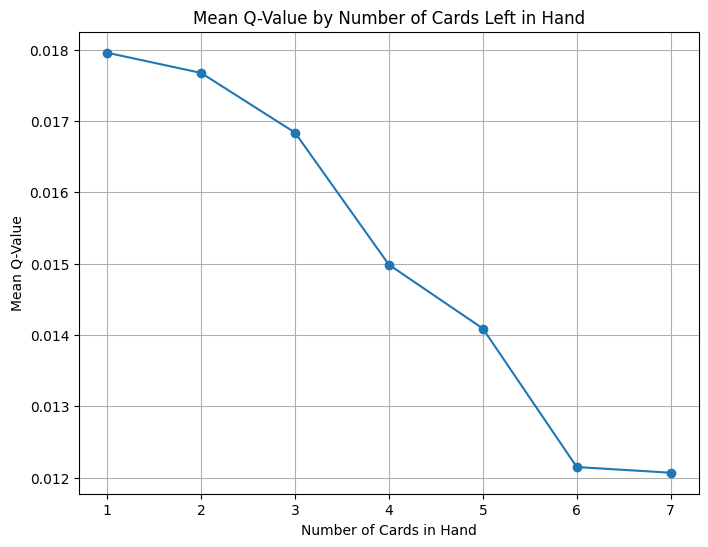

In [177]:
q_values['HAND'] = q_values['State'].apply(lambda x: int(x[-2]))
q_values['Total_Value'] = q_values.loc[:, 'Red':'Cc'].sum(axis=1)

grouped = q_values.groupby('HAND')['Total_Value']

mean_values = grouped.mean()

plt.figure(figsize=(8, 6))
plt.plot(mean_values[1:].index, mean_values[1:].values, marker='o', linestyle='-')
plt.xlabel('Number of Cards in Hand')
plt.ylabel('Mean Q-Value')
plt.title('Mean Q-Value by Number of Cards Left in Hand')
plt.grid(True)
plt.show()

In [175]:
df = pd.read_csv('csv/records.csv')
df.drop(columns=df.columns[0], axis=1,  inplace=True)
new_row = pd.DataFrame({'Winner':'', 'Turns':0.0, 'Win_Rate':0.0}, index =[0])
df = pd.concat([new_row, df]).reset_index(drop = True)
df.head()

,Winner,Turns,Win_Rate
0,,0.0,0.00
1,Bot,91.0,1.00
2,Bot,20.0,1.00
3,Bot,91.0,1.00
4,AI,75.0,0.25


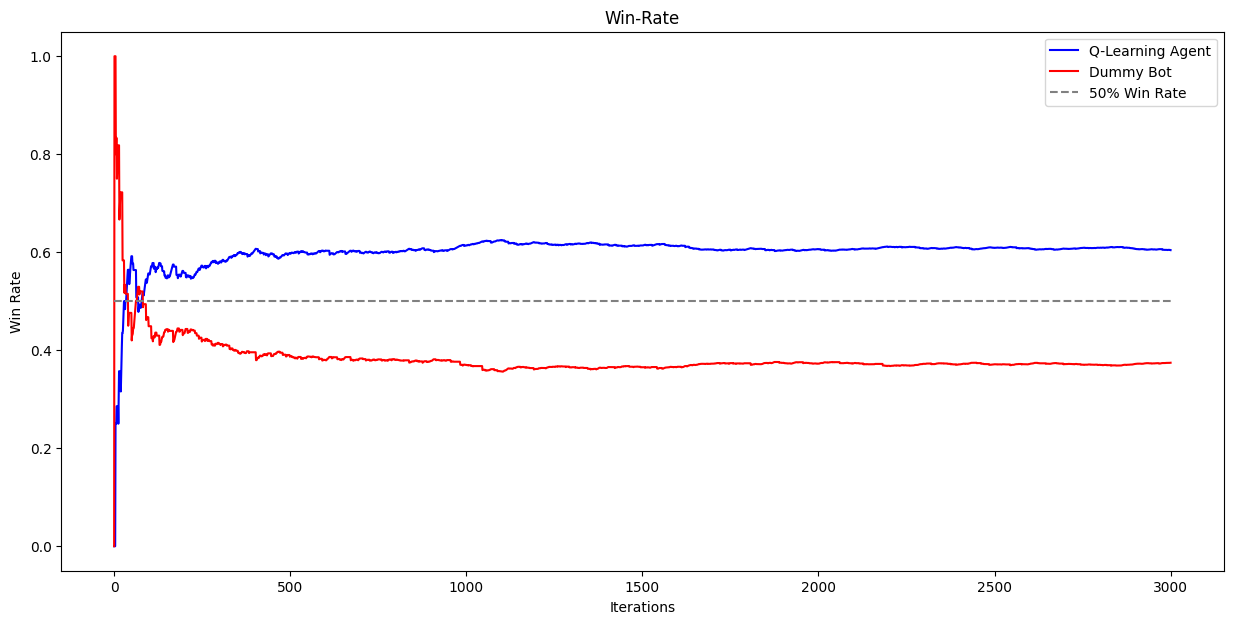

In [176]:
fig = plt.figure(1, figsize=(15,7))
ai_wins = [0]
bot_wins = [0]
for i in df.index:
    if i != 0:
        if df['Winner'][i] == 'AI':
            ai_wins.append(df['Win_Rate'][i])
            bot_wins.append(bot_wins[-1])
        elif df['Winner'][i] == 'Bot':
            bot_wins.append(df['Win_Rate'][i])
            ai_wins.append(ai_wins[-1])
        else:
            bot_wins.append(bot_wins[-1])
            ai_wins.append(ai_wins[-1])
plt.plot(df.index, ai_wins, color='blue', label='Q-Learning Agent')
plt.plot(df.index, bot_wins, color='red', label='Dummy Bot')
plt.hlines(0.5, 0, len(df), colors="grey", linestyles="dashed", label="50% Win Rate")

plt.title("Win-Rate")
plt.xlabel("Iterations")
plt.ylabel("Win Rate")
plt.legend()
plt.show()